# MNIST

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow.keras
import tensorflow as tf

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print('X train shape',x_train.shape)
print("Y train shape",y_train.shape)
print('X test shape',x_test.shape)
print('y_test shape',y_test.shape)


X train shape (60000, 28, 28)
Y train shape (60000,)
X test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [3]:
import matplotlib.pyplot as plt

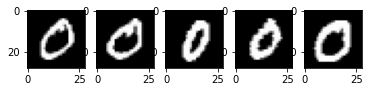

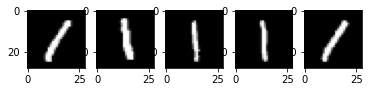

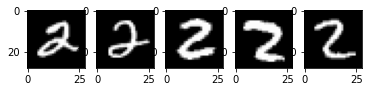

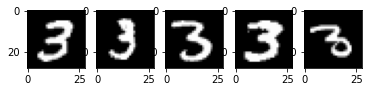

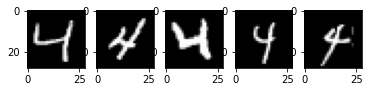

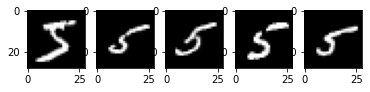

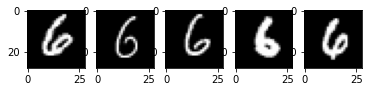

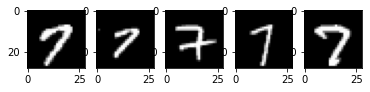

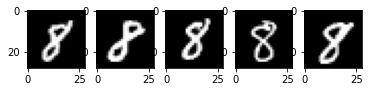

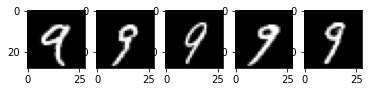

In [4]:
for i in range(0,10,1):
  plt.figure(i)
  index=0
  count=0
  while count<5:
    
    if (y_train[index]==i):
      count=count+1
      
      plt.subplot(1,5,count)
      plt.imshow(x_train[index],cmap='gray')
    
    index=index+1
  plt.show()


In [5]:
import numpy as np
import pandas as pd

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

In [ ]:
from prettytable import PrettyTable

columns = ["Sno.", "Class", "Count"]

myTable = PrettyTable()

myTable.add_column(columns[0], list(range(1,len(unique)+1)))
myTable.add_column(columns[1], unique)
myTable.add_column(columns[2], counts)

print(myTable)


+------+-------+-------+
| Sno. | Class | Count |
+------+-------+-------+
|  1   |   0   |  980  |
|  2   |   1   |  1135 |
|  3   |   2   |  1032 |
|  4   |   3   |  1010 |
|  5   |   4   |  982  |
|  6   |   5   |  892  |
|  7   |   6   |  958  |
|  8   |   7   |  1028 |
|  9   |   8   |  974  |
|  10  |   9   |  1009 |
+------+-------+-------+


In [ ]:
x_train.shape

(60000, 28, 28)

In [6]:
X_train = np.expand_dims(x_train, axis=-1)
print(X_train.shape)

X_test = np.expand_dims(x_test, axis=-1)
print(X_test.shape)

X_train = X_train/255
X_test = X_test/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [9]:
# USING Functional API
# Convolutional Neural Network
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 16)          8208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0     

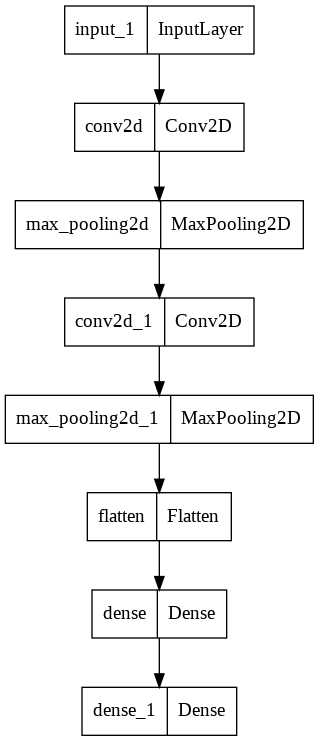

In [8]:

#Input(shape=(IMG_SHAPE, IMG_SHAPE, CHANNELS))
img_heig,img_wdt = 28,28
channels = 1

input = Input(shape=(img_heig,img_wdt,channels))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(10, activation='softmax')(hidden1)
model = Model(inputs=input, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='convolutional_neural_network.png')

In [ ]:
type(y_train[2])

numpy.uint8

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=64,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
938/938 [==============================] - 17s 5ms/step - loss: 2.3171 - accuracy: 0.0547 - val_loss: 2.3116 - val_accuracy: 0.0542
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 2.3066 - accuracy: 0.0587 - val_loss: 2.3017 - val_accuracy: 0.0633
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 2.2968 - accuracy: 0.0725 - val_loss: 2.2917 - val_accuracy: 0.0805
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 2.2867 - accuracy: 0.0961 - val_loss: 2.2815 - val_accuracy: 0.1085
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 2.2767 - accuracy: 0.1217 - val_loss: 2.2716 - val_accuracy: 0.1352
Epoch 6/50
938/938 [==============================] - 3s 4ms/step - loss: 2.2672 - accuracy: 0.1434 - val_loss: 2.2622 - val_accuracy: 0.1551
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 2.2577 - accuracy: 0.1614 - val_loss: 2.2526 - val_accuracy: 0.1695
Epoch

In [ ]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 1.5237 - accuracy: 0.5591 - val_loss: 1.4946 - val_accuracy: 0.5739
Epoch 2/50
938/938 [==============================] - 3s 4ms/step - loss: 1.5074 - accuracy: 0.5654 - val_loss: 1.4778 - val_accuracy: 0.5815
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 1.4914 - accuracy: 0.5702 - val_loss: 1.4614 - val_accuracy: 0.5853
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 1.4756 - accuracy: 0.5762 - val_loss: 1.4451 - val_accuracy: 0.5910
Epoch 5/50
938/938 [==============================] - 3s 4ms/step - loss: 1.4599 - accuracy: 0.5814 - val_loss: 1.4291 - val_accuracy: 0.5960
Epoch 6/50
938/938 [==============================] - 3s 4ms/step - loss: 1.4445 - accuracy: 0.5859 - val_loss: 1.4134 - val_accuracy: 0.6010
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 1.4295 - accuracy: 0.5905 - val_loss: 1.3981 - val_accuracy: 0.6048
Epoch 

In [ ]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.9404 - accuracy: 0.7117 - val_loss: 0.9046 - val_accuracy: 0.7264
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.9314 - accuracy: 0.7134 - val_loss: 0.8953 - val_accuracy: 0.7285
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.9224 - accuracy: 0.7156 - val_loss: 0.8861 - val_accuracy: 0.7309
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.9135 - accuracy: 0.7179 - val_loss: 0.8771 - val_accuracy: 0.7330
Epoch 5/50
938/938 [==============================] - 3s 4ms/step - loss: 0.9047 - accuracy: 0.7197 - val_loss: 0.8680 - val_accuracy: 0.7350
Epoch 6/50
938/938 [==============================] - 3s 4ms/step - loss: 0.8959 - accuracy: 0.7222 - val_loss: 0.8590 - val_accuracy: 0.7383
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.8872 - accuracy: 0.7246 - val_loss: 0.8502 - val_accuracy: 0.7417
Epoch 

In [ ]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5760 - accuracy: 0.8324 - val_loss: 0.5391 - val_accuracy: 0.8485
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5714 - accuracy: 0.8338 - val_loss: 0.5347 - val_accuracy: 0.8498
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5668 - accuracy: 0.8350 - val_loss: 0.5303 - val_accuracy: 0.8510
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5624 - accuracy: 0.8365 - val_loss: 0.5260 - val_accuracy: 0.8515
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5581 - accuracy: 0.8377 - val_loss: 0.5218 - val_accuracy: 0.8531
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5538 - accuracy: 0.8391 - val_loss: 0.5178 - val_accuracy: 0.8545
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.5496 - accuracy: 0.8403 - val_loss: 0.5137 - val_accuracy: 0.8554
Epoch 

In [ ]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/100
938/938 [==============================] - 4s 4ms/step - loss: 0.4204 - accuracy: 0.8786 - val_loss: 0.3898 - val_accuracy: 0.8889
Epoch 2/100
938/938 [==============================] - 4s 4ms/step - loss: 0.4184 - accuracy: 0.8793 - val_loss: 0.3879 - val_accuracy: 0.8895
Epoch 3/100
938/938 [==============================] - 3s 4ms/step - loss: 0.4163 - accuracy: 0.8800 - val_loss: 0.3858 - val_accuracy: 0.8897
Epoch 4/100
938/938 [==============================] - 3s 4ms/step - loss: 0.4142 - accuracy: 0.8806 - val_loss: 0.3839 - val_accuracy: 0.8903
Epoch 5/100
938/938 [==============================] - 4s 4ms/step - loss: 0.4123 - accuracy: 0.8813 - val_loss: 0.3820 - val_accuracy: 0.8910
Epoch 6/100
938/938 [==============================] - 4s 4ms/step - loss: 0.4103 - accuracy: 0.8816 - val_loss: 0.3802 - val_accuracy: 0.8913
Epoch 7/100
938/938 [==============================] - 4s 4ms/step - loss: 0.4083 - accuracy: 0.8823 - val_loss: 0.3782 - val_accuracy: 0.8919

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_MNIST/simple_model2.h5')

In [ ]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=300,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/300
938/938 [==============================] - 4s 5ms/step - loss: 0.2907 - accuracy: 0.9161 - val_loss: 0.2656 - val_accuracy: 0.9224
Epoch 2/300
938/938 [==============================] - 4s 4ms/step - loss: 0.2899 - accuracy: 0.9162 - val_loss: 0.2647 - val_accuracy: 0.9225
Epoch 3/300
938/938 [==============================] - 4s 4ms/step - loss: 0.2891 - accuracy: 0.9165 - val_loss: 0.2640 - val_accuracy: 0.9224
Epoch 4/300
938/938 [==============================] - 4s 4ms/step - loss: 0.2883 - accuracy: 0.9167 - val_loss: 0.2633 - val_accuracy: 0.9226
Epoch 5/300
938/938 [==============================] - 4s 4ms/step - loss: 0.2875 - accuracy: 0.9170 - val_loss: 0.2624 - val_accuracy: 0.9229
Epoch 6/300
938/938 [==============================] - 4s 4ms/step - loss: 0.2867 - accuracy: 0.9171 - val_loss: 0.2618 - val_accuracy: 0.9229
Epoch 7/300
938/938 [==============================] - 4s 4ms/step - loss: 0.2859 - accuracy: 0.9173 - val_loss: 0.2610 - val_accuracy: 0.9229

In [ ]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=300,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/300
938/938 [==============================] - 4s 4ms/step - loss: 0.1692 - accuracy: 0.9505 - val_loss: 0.1533 - val_accuracy: 0.9531
Epoch 2/300
938/938 [==============================] - 4s 4ms/step - loss: 0.1690 - accuracy: 0.9505 - val_loss: 0.1531 - val_accuracy: 0.9531
Epoch 3/300
938/938 [==============================] - 4s 4ms/step - loss: 0.1688 - accuracy: 0.9504 - val_loss: 0.1529 - val_accuracy: 0.9528
Epoch 4/300
938/938 [==============================] - 4s 4ms/step - loss: 0.1686 - accuracy: 0.9507 - val_loss: 0.1526 - val_accuracy: 0.9533
Epoch 5/300
938/938 [==============================] - 3s 4ms/step - loss: 0.1684 - accuracy: 0.9505 - val_loss: 0.1525 - val_accuracy: 0.9534
Epoch 6/300
938/938 [==============================] - 3s 4ms/step - loss: 0.1682 - accuracy: 0.9504 - val_loss: 0.1523 - val_accuracy: 0.9535
Epoch 7/300
938/938 [==============================] - 4s 4ms/step - loss: 0.1680 - accuracy: 0.9506 - val_loss: 0.1521 - val_accuracy: 0.9535

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_MNIST/simple_model3.h5')

In [ ]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=300,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/300
938/938 [==============================] - 4s 4ms/step - loss: 0.1284 - accuracy: 0.9619 - val_loss: 0.1186 - val_accuracy: 0.9634
Epoch 2/300
938/938 [==============================] - 4s 4ms/step - loss: 0.1283 - accuracy: 0.9617 - val_loss: 0.1186 - val_accuracy: 0.9635
Epoch 3/300
938/938 [==============================] - 3s 4ms/step - loss: 0.1282 - accuracy: 0.9618 - val_loss: 0.1184 - val_accuracy: 0.9636
Epoch 4/300
938/938 [==============================] - 4s 4ms/step - loss: 0.1281 - accuracy: 0.9618 - val_loss: 0.1183 - val_accuracy: 0.9636
Epoch 5/300
938/938 [==============================] - 3s 4ms/step - loss: 0.1280 - accuracy: 0.9619 - val_loss: 0.1182 - val_accuracy: 0.9635
Epoch 6/300
938/938 [==============================] - 3s 4ms/step - loss: 0.1279 - accuracy: 0.9619 - val_loss: 0.1184 - val_accuracy: 0.9637
Epoch 7/300
938/938 [==============================] - 4s 4ms/step - loss: 0.1279 - accuracy: 0.9620 - val_loss: 0.1181 - val_accuracy: 0.9635

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_MNIST/simple_model4.h5')

In [11]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CNN_MNIST/simple_model4.h5')

In [14]:
y_test_predected  =  model.predict(X_test)

In [24]:
y_pred = np.argmax(y_test_predected,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [32]:
print('Test Accuracy : ',round(sum(y_pred==y_test)/len(y_test),4)*100)

Test Accuracy :  96.78


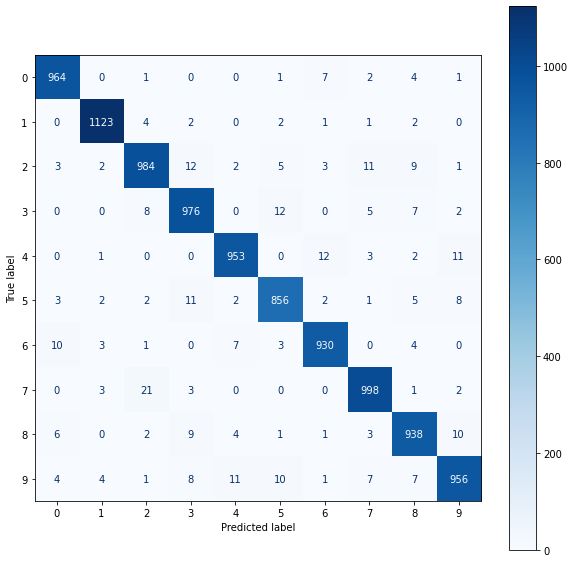

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = list(range(0,10,1))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
fig = disp.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10)  
#plt.figure(figsize=(20, 20))

plt.show()

In [51]:
precision = np.diag(cm)/np.sum(cm,axis=0)
recall = np.diag(cm)/np.sum(cm,axis=1)

In [60]:
from prettytable import PrettyTable

columns = ["Sno.", "Class", "Precision",'Recall']

myTable = PrettyTable()

myTable.add_column(columns[0], labels)
myTable.add_column(columns[1], labels)
myTable.add_column(columns[2], np.round(precision*100,2))
myTable.add_column(columns[3], np.round(recall*100,2))
print(myTable)


+------+-------+-----------+--------+
| Sno. | Class | Precision | Recall |
+------+-------+-----------+--------+
|  0   |   0   |   97.37   | 98.37  |
|  1   |   1   |   98.68   | 98.94  |
|  2   |   2   |   96.09   | 95.35  |
|  3   |   3   |   95.59   | 96.63  |
|  4   |   4   |   97.34   | 97.05  |
|  5   |   5   |   96.18   | 95.96  |
|  6   |   6   |   97.18   | 97.08  |
|  7   |   7   |    96.8   | 97.08  |
|  8   |   8   |   95.81   |  96.3  |
|  9   |   9   |   96.47   | 94.75  |
+------+-------+-----------+--------+
